## Time series data for power plants

### 1. Import data (Jan 2007 - Oct 2017)

In [1]:
import pandas as pd

In [2]:
%%time
path_eia923 = './eia923/'
df_eia923_y2017 = pd.read_excel(path_eia923 + 'EIA923_Schedules_2_3_4_5_M_10_2017_20DEC2017.xlsx', 
                   sheetname='Page 1 Generation and Fuel Data',
                   header = [2, 3], skiprows = [0, 1])

CPU times: user 30.4 s, sys: 165 ms, total: 30.6 s
Wall time: 30.7 s


In [3]:
%%time
#path_eia923 = './eia923/'
df_eia923_y2016 = pd.read_excel(path_eia923 + 'f923_2016/EIA923_Schedules_2_3_4_5_M_12_2016_Final_Revision.xlsx', 
                   sheetname='Page 1 Generation and Fuel Data',
                   header = [2, 3], skiprows = [0, 1])

CPU times: user 36.8 s, sys: 123 ms, total: 36.9 s
Wall time: 37 s


### 2.B Clean data by State

In [4]:
def clean_by_state(raw_df, state_str, year_str, delim = '\n', state_col = 'Plant State'):
    # Set columns to be single level
    raw_df.columns = raw_df.columns.get_level_values(1)
    # Drop the rows that don't correspond to a specific operator
    drop_row_ind = raw_df.loc[:, 'Operator Id'] == 99999
    df = raw_df.loc[~drop_row_ind, :]
    # select by State
    state_row_ind = df.loc[:, state_col] == state_str
    df = df.loc[state_row_ind, :]
    # select by Plant Id
    #plant_row_ind = raw_df.loc[:, 'Plant Id'] == 50187
    #df = raw_df.loc[plant_row_ind, :]
    # Use plant's & operator's id and name as row index
#     df = df.set_index(['Plant Id', 'Plant Name', 'Operator Id', 'Operator Name', state_col])
    df = df.set_index(['Plant Id'])
    # Select columns that contains generation
    col_ind = [i for i in df.columns if 'Netgen' in i]
    df = df.loc[:, col_ind]
    # Rename columns to append year
    col_new_name = [i.split(delim)[1][:3].upper() + '_' + year_str for i in df.columns]
    df.columns = col_new_name
    #df.index.set_names('Plant Id', inplace = True)
#     df.index.set_names('Plant Id', level = 0, inplace = True)
#     df.index.set_names('Plant Name', level = 1, inplace = True)
#     df.index.set_names('Operator Id', level = 2, inplace = True)
#     df.index.set_names('Operator Name', level = 3, inplace = True)
#     df.index.set_names('Plant State', level = 4, inplace = True)
    df.reset_index(level=0, inplace=True)
    #return df
    return df.groupby('Plant Id').sum()

In [5]:
df2017_test01 = clean_by_state(df_eia923_y2017, 'DC', '2017')

In [6]:
df2017_test01

,JAN_2017,FEB_2017,MAR_2017,APR_2017,MAY_2017,JUN_2017,JUL_2017,AUG_2017,SEP_2017,OCT_2017,NOV_2017,DEC_2017
Plant Id,,,,,,,,,,,,
57788,4452,1881,3913,69,1063,3910,357,345,2999,0,..,..
59012,5265,3616,4981,3796,3551,2017,5309,2270,2198,4692,..,..


In [7]:
df2017_test01.drop(['NOV_2017', 'DEC_2017'], axis = 1, inplace = True)

In [8]:
df2017_test01

,JAN_2017,FEB_2017,MAR_2017,APR_2017,MAY_2017,JUN_2017,JUL_2017,AUG_2017,SEP_2017,OCT_2017
Plant Id,,,,,,,,,,
57788,4452,1881,3913,69,1063,3910,357,345,2999,0
59012,5265,3616,4981,3796,3551,2017,5309,2270,2198,4692


In [9]:
df2016_test01 = clean_by_state(df_eia923_y2016, 'DC', '2016')

In [10]:
df2016_test01.head()

,JAN_2016,FEB_2016,MAR_2016,APR_2016,MAY_2016,JUN_2016,JUL_2016,AUG_2016,SEP_2016,OCT_2016,NOV_2016,DEC_2016
Plant Id,,,,,,,,,,,,
57788,1902.056,1730.165,1798.083,1738.92,1953.031,2242.411,2602.849,2581.914,2105.449,1771.500,1624.259,1622.363
59012,4516.490,4204.756,4389.223,4676.62,4655.934,4374.110,4431.028,4393.639,3995.067,3893.778,4375.901,4894.454


In [11]:
ts_test01 = pd.concat([df2016_test01, df2017_test01], axis = 1)

In [12]:
ts_test01.head()

,JAN_2016,FEB_2016,MAR_2016,APR_2016,MAY_2016,JUN_2016,JUL_2016,AUG_2016,SEP_2016,OCT_2016,...,JAN_2017,FEB_2017,MAR_2017,APR_2017,MAY_2017,JUN_2017,JUL_2017,AUG_2017,SEP_2017,OCT_2017
Plant Id,,,,,,,,,,,,,,,,,,,,,
57788,1902.056,1730.165,1798.083,1738.92,1953.031,2242.411,2602.849,2581.914,2105.449,1771.500,...,4452,1881,3913,69,1063,3910,357,345,2999,0
59012,4516.490,4204.756,4389.223,4676.62,4655.934,4374.110,4431.028,4393.639,3995.067,3893.778,...,5265,3616,4981,3796,3551,2017,5309,2270,2198,4692


In [13]:
df_ts = pd.DataFrame(ts_test01)

In [14]:
df_ts

,JAN_2016,FEB_2016,MAR_2016,APR_2016,MAY_2016,JUN_2016,JUL_2016,AUG_2016,SEP_2016,OCT_2016,...,JAN_2017,FEB_2017,MAR_2017,APR_2017,MAY_2017,JUN_2017,JUL_2017,AUG_2017,SEP_2017,OCT_2017
Plant Id,,,,,,,,,,,,,,,,,,,,,
57788,1902.056,1730.165,1798.083,1738.92,1953.031,2242.411,2602.849,2581.914,2105.449,1771.500,...,4452,1881,3913,69,1063,3910,357,345,2999,0
59012,4516.490,4204.756,4389.223,4676.62,4655.934,4374.110,4431.028,4393.639,3995.067,3893.778,...,5265,3616,4981,3796,3551,2017,5309,2270,2198,4692


In [15]:
df_ts01 = df_ts.transpose()

In [16]:
df_ts01.head(3)

Plant Id,57788,59012
JAN_2016,1902.056,4516.490
FEB_2016,1730.165,4204.756
MAR_2016,1798.083,4389.223


In [17]:
# df_ts01.columns = df_ts01.iloc[0]

In [18]:
df_ts01.head(3)

Plant Id,57788,59012
JAN_2016,1902.056,4516.490
FEB_2016,1730.165,4204.756
MAR_2016,1798.083,4389.223


In [20]:
#df_ts02 = df_ts01.drop(['Plant Id'])

In [21]:
# df_ts02.head(3)

NameError: name 'df_ts02' is not defined

In [22]:
df_ts01.reset_index(level=0, inplace=True)

In [23]:
df_ts01.head(3)

Plant Id,index,57788,59012
0,JAN_2016,1902.056,4516.490
1,FEB_2016,1730.165,4204.756
2,MAR_2016,1798.083,4389.223


In [24]:
df_ts01.columns = ['mon_yr', 57788, 59012]

In [25]:
df_ts01.head(3)

,mon_yr,57788,59012
0,JAN_2016,1902.056,4516.490
1,FEB_2016,1730.165,4204.756
2,MAR_2016,1798.083,4389.223


In [26]:
df_ts01.tail(3)

,mon_yr,57788,59012
19,AUG_2017,345.0,2270.0
20,SEP_2017,2999.0,2198.0
21,OCT_2017,0.0,4692.0


In [27]:
df_ts01['time_stamp'] = pd.date_range(start = '2016-01-01', end = '2017-11-1', freq = 'M')

In [30]:
df_ts01.head(3)

,mon_yr,57788,59012,time_stamp
0,JAN_2016,1902.056,4516.490,2016-01-31
1,FEB_2016,1730.165,4204.756,2016-02-29
2,MAR_2016,1798.083,4389.223,2016-03-31


In [31]:
df_ts01.drop(['mon_yr'], axis = 1, inplace = True)

In [32]:
df_ts01_input = df_ts01.loc[:,['time_stamp', 57788, 59012]]

In [33]:
df_ts01_input.head(5)

,time_stamp,57788,59012
0,2016-01-31,1902.056,4516.490
1,2016-02-29,1730.165,4204.756
2,2016-03-31,1798.083,4389.223
3,2016-04-30,1738.920,4676.620
4,2016-05-31,1953.031,4655.934


In [34]:
df_ts01_input.to_csv('DCplants20162017.csv', index = False)

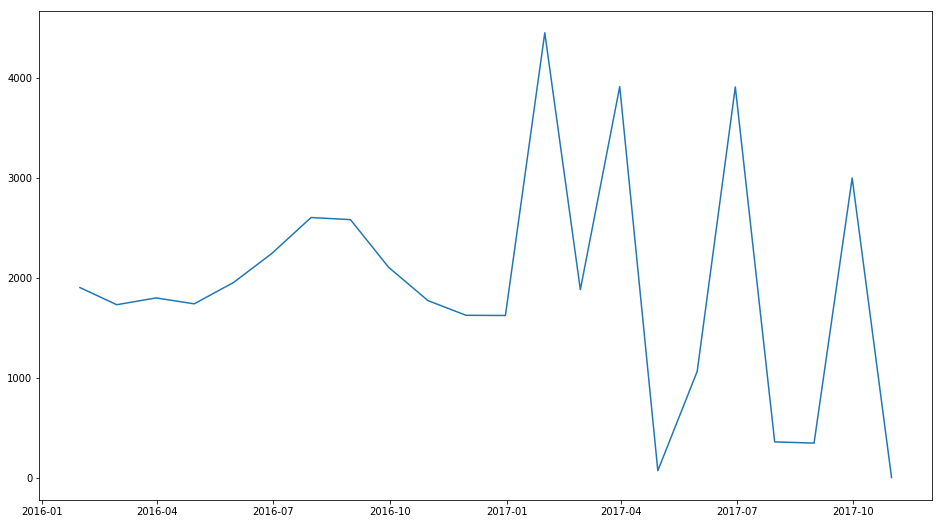

In [38]:
fig, ax = plt.subplots(figsize = (16, 9))
plt.plot(df_ts01_input.time_stamp, df_ts01.loc[:,57788])
#plt.plot(df_ts01_input.time_stamp, df_ts01.loc[:,59012])

In [4]:
%%time
df_eia923_y2015 = pd.read_excel(path_eia923 + 'f923_2015/EIA923_Schedules_2_3_4_5_M_12_2015_Final_Revision.xlsx', 
                   sheetname='Page 1 Generation and Fuel Data',
                   header = [2, 3], skiprows = [0, 1])

CPU times: user 39.3 s, sys: 260 ms, total: 39.5 s
Wall time: 39.9 s


In [5]:
%%time
df_eia923_y2014 = pd.read_excel(path_eia923 + 'f923_2014/EIA923_Schedules_2_3_4_5_M_12_2014_Final_Revision.xlsx', 
                   sheetname='Page 1 Generation and Fuel Data',
                   header = [2, 3], skiprows = [0, 1])

CPU times: user 41 s, sys: 238 ms, total: 41.2 s
Wall time: 41.7 s


In [6]:
%%time
df_eia923_y2013 = pd.read_excel(path_eia923 + 'f923_2013/EIA923_Schedules_2_3_4_5_2013_Final_Revision.xlsx', 
                   sheetname='Page 1 Generation and Fuel Data',
                   header = [2, 3], skiprows = [0, 1])

CPU times: user 36.5 s, sys: 201 ms, total: 36.7 s
Wall time: 37 s


In [7]:
%%time
df_eia923_y2012 = pd.read_excel(path_eia923 + 'f923_2012/EIA923_Schedules_2_3_4_5_M_12_2012_Final_Revision.xlsx', 
                   sheetname='Page 1 Generation and Fuel Data',
                   header = [2, 3], skiprows = [0, 1])

CPU times: user 33.7 s, sys: 93.4 ms, total: 33.8 s
Wall time: 33.9 s


In [8]:
%%time
df_eia923_y2011 = pd.read_excel(path_eia923 + 'f923_2011/EIA923_Schedules_2_3_4_5_2011_Final_Revision.xlsx', 
                   sheetname='Page 1 Generation and Fuel Data',
                   header = [2, 3], skiprows = [0, 1])

CPU times: user 38.5 s, sys: 94.3 ms, total: 38.6 s
Wall time: 38.7 s


In [9]:
%%time
df_eia923_y2010 = pd.read_excel(path_eia923 + 'f923_2010/SCHEDULE 3A 5A 8A 8B 8C 8D 8E 8F 2010 on NOV 30 2011.xls', 
                   sheetname='Generator',
                   header = [4], skiprows = [0, 1, 2])

CPU times: user 3.28 s, sys: 49.6 ms, total: 3.33 s
Wall time: 3.4 s


In [10]:
%%time
df_eia923_y2009 = pd.read_excel(path_eia923 + 'f923_2009/SCHEDULE 3A 5A 8A 8B 8C 8D 8E 8F REVISED 2009 04112011.xls', 
                   sheetname='Generator',
                   header = [4], skiprows = [0, 1, 2])

CPU times: user 2.13 s, sys: 15.2 ms, total: 2.14 s
Wall time: 2.18 s


In [11]:
%%time
df_eia923_y2008 = pd.read_excel(path_eia923 + 'f923_2008/SCHEDULE 3A 5A 8A 8B 8C 8D 8E 8F 2008.xlsm', 
                   sheetname='Generator Data',
                   header = [4], skiprows = [0, 1, 2])

CPU times: user 7.49 s, sys: 22.5 ms, total: 7.52 s
Wall time: 7.53 s


In [12]:
%%time
df_eia923_y2007 = pd.read_excel(path_eia923 + 'f906920_2007/f906920_2007.xls', 
                   sheetname='Page 1 Generation and Fuel Data',
                   header = [4], skiprows = [0, 1])

CPU times: user 4.02 s, sys: 36.4 ms, total: 4.06 s
Wall time: 4.13 s


### 2. Clean Data (month as columns)

In [13]:
def clean_by_year(raw_df, year_str, delim = '\n', state_col = 'Plant State'):
    # Set columns to be single level
    raw_df.columns = raw_df.columns.get_level_values(1)
    # Drop the rows that don't correspond to a specific operator
#    drop_row_ind = raw_df.loc[:, 'Operator Id'] == 99999
#    df = raw_df.loc[~drop_row_ind, :]
#     # select by State
#     state_row_ind = df.loc[:, state_col] == 'WA'
#     df = df.loc[state_row_ind, :]
    # select by Plant Id
    plant_row_ind = raw_df.loc[:, 'Plant Id'] == 50187
    df = raw_df.loc[plant_row_ind, :]
    # Use plant's & operator's id and name as row index
#     df = df.set_index(['Plant Id', 'Plant Name', 'Operator Id', 'Operator Name', state_col])
    df = df.set_index(['Plant Id'])
    # Select columns that contains generation
    col_ind = [i for i in df.columns if 'Netgen' in i]
    df = df.loc[:, col_ind]
    # Rename columns to append year
    col_new_name = [i.split(delim)[1][:3].upper() + '_' + year_str for i in df.columns]
    df.columns = col_new_name
    df.index.set_names('Plant Id', inplace = True)
#     df.index.set_names('Plant Id', level = 0, inplace = True)
#     df.index.set_names('Plant Name', level = 1, inplace = True)
#     df.index.set_names('Operator Id', level = 2, inplace = True)
#     df.index.set_names('Operator Name', level = 3, inplace = True)
#     df.index.set_names('Plant State', level = 4, inplace = True)
    
    return df#.sum(axis = 0)

In [14]:
df2017_new = clean_by_year(df_eia923_y2017, '2017')

In [15]:
df2017_new

,JAN_2017,FEB_2017,MAR_2017,APR_2017,MAY_2017,JUN_2017,JUL_2017,AUG_2017,SEP_2017,OCT_2017,NOV_2017,DEC_2017
Plant Id,,,,,,,,,,,,
50187,14139.9,12915.7,12275.7,6836.34,8043.99,14012.7,16917.9,.,12161.8,11455,.,.
50187,3.694,45.057,21.548,7.651,32.866,0,0,.,0,9.937,.,.
50187,5407.91,4349.62,3142.39,2181.99,1614.42,1592.89,1243.33,.,3806.15,3489.42,.,.
50187,122.018,4.169,9.703,313.793,66.137,24.089,0,.,276.62,38.523,.,.
50187,1512.64,1034.12,937.881,578.79,788.894,877.872,1070.58,.,729.619,845.346,.,.
50187,2826.57,3053.61,447.917,2782.29,3101.06,1088.37,2791.58,.,1397.83,2706.1,.,.
50187,6003.62,3530.05,4131.78,1857.42,4425.63,4986.17,4668.5,.,3478.88,3818.01,.,.


In [16]:
df2016_new = clean_by_year(df_eia923_y2016, '2016')

In [17]:
df2016_new

,JAN_2016,FEB_2016,MAR_2016,APR_2016,MAY_2016,JUN_2016,JUL_2016,AUG_2016,SEP_2016,OCT_2016,NOV_2016,DEC_2016
Plant Id,,,,,,,,,,,,
50187,13081.1,14054.2,7424.77,14127.7,11985.9,10980.4,15940.9,16121.8,11221.2,15741.1,14380.2,9793.68
50187,0,0,0,.,2.356,5.934,0,19.649,6.462,13.302,0,14.04
50187,6093.28,4340.11,5153.69,2937.01,704.605,1683.04,1399.68,1601.57,3416.69,3090.98,3240.93,5218.55
50187,0,66.889,163.451,305.88,22.268,98.664,0,0,44.566,2.479,1.065,48.35
50187,1116.23,1383.94,941.294,1402.44,643.742,794.842,1417.72,1175.47,339.756,1185.78,1247.29,1560.97
50187,2781.54,3976.98,2624.52,2669.92,1665.05,1716.09,4818.18,2304.26,643.735,2421,3511.84,3866.08
50187,3341.88,4511.87,4395.6,3007.79,2021.48,3489.6,4021.78,4477.07,1893.7,3627.99,4207.11,4310.45


In [18]:
df2015_new = clean_by_year(df_eia923_y2015, '2015')

In [19]:
df2015_new

,JAN_2015,FEB_2015,MAR_2015,APR_2015,MAY_2015,JUN_2015,JUL_2015,AUG_2015,SEP_2015,OCT_2015,NOV_2015,DEC_2015
Plant Id,,,,,,,,,,,,
50187,10513.4,7840.75,14018.8,12227.8,15634.8,12253.3,17651.5,14413.4,12833.9,17608.5,12332,12102.7
50187,0,0,0,0,0,0,0,0,0,0,0,0
50187,5083.37,1667.47,1741.14,1040.5,1284.34,2771.75,919.063,2970.7,1764.83,2591.2,4580.57,3791.59
50187,0,87.444,0,0,0,453.874,360.236,170.691,35.624,100.658,247.737,84.699
50187,775.034,1061.04,1255.46,1220.76,1223.55,881.072,1497.8,1169.4,1070.05,1713.13,1507.85,1078.47
50187,1639.03,2463.28,3885.49,3418.18,3888.68,2583.96,3834.68,1770.65,3196,2406.95,3678.08,3202.16
50187,2602.13,3273.33,4757.92,3791.89,4576.7,4189.65,5647.77,3934.11,4155.59,4612.54,5162.8,4453.35


In [20]:
df2014_new = clean_by_year(df_eia923_y2014, '2014')

In [21]:
df2014_new.head()

,JAN_2014,FEB_2014,MAR_2014,APR_2014,MAY_2014,JUN_2014,JUL_2014,AUG_2014,SEP_2014,OCT_2014,NOV_2014,DEC_2014
Plant Id,,,,,,,,,,,,
50187,14760.7,16291.2,13438.8,15146.3,13344,15305.8,16696.5,19526,4396.56,15769.1,15368.4,14774
50187,0,0,0,0,0,0,0,0,0,0,0,0
50187,2592.44,1968.84,2414.95,936.773,953.701,1171.84,2154.07,2121.18,2375.96,1713.9,2848.38,2682.62
50187,74.771,2.026,315.602,91.222,0,114.115,67.367,0,0,0,0,0
50187,1469.65,1533.61,1395.23,1346.4,1315.43,1363.84,1032.78,1486.23,1293.94,1746.67,1792.65,1578.55


In [22]:
df2013_new = clean_by_year(df_eia923_y2013, '2013', delim = '_', state_col = 'State')

In [23]:
df2013_new.head()

,JAN_2013,FEB_2013,MAR_2013,APR_2013,MAY_2013,JUN_2013,JUL_2013,AUG_2013,SEP_2013,OCT_2013,NOV_2013,DEC_2013
Plant Id,,,,,,,,,,,,
50187,17348.4,15985.8,16343,14408.6,11551.3,14851,15516.8,19865.3,11675.1,16360.5,16305.5,16624.6
50187,0,0,0,0,0,0,0,0,0,0,0,0
50187,3131.66,2567.2,2393.22,4373.49,5385.76,2197.07,646.825,998.509,2264.83,4205.64,1417.08,2525.73
50187,69.656,73.373,30.714,130.466,47.7,172.46,101.167,124.973,173.732,0,118.465,10.763
50187,1190.41,1285.28,1544.51,626.242,0,835.286,1227.84,1484.9,1225.38,1348.67,1587.52,1820.95


In [24]:
df2012_new = clean_by_year(df_eia923_y2012, '2012')

In [25]:
df2012_new.head()

,JAN_2012,FEB_2012,MAR_2012,APR_2012,MAY_2012,JUN_2012,JUL_2012,AUG_2012,SEP_2012,OCT_2012,NOV_2012,DEC_2012
Plant Id,,,,,,,,,,,,
50187,17191.4,17303.4,10789.6,10602.4,14914.4,10845.8,13402,17914.7,18716.5,17318.4,17701.1,16797.2
50187,0,0,0,0,0,0,0,0,0,0,0,0
50187,2872.59,3102.17,3178.14,2038.34,2180.96,2481.93,318.058,832.507,956.075,1621.22,978.611,1923.83
50187,0,0,388.994,47.856,146.42,0,0,194.375,0,0,138.476,118.64
50187,1420.78,1402.09,1285.57,751.206,1103.18,487.615,885.71,957.781,1189.25,767.08,1244.44,1123.1


In [26]:
df2011_new = clean_by_year(df_eia923_y2011, '2011', '_', state_col = 'State')

In [27]:
df2011_new.head()

,JAN_2011,FEB_2011,MAR_2011,APR_2011,MAY_2011,JUN_2011,JUL_2011,AUG_2011,SEP_2011,OCT_2011,NOV_2011,DEC_2011
Plant Id,,,,,,,,,,,,
50187,16850.2,14843.5,9949.38,10694.4,11131.9,7605.05,10306.5,17807.3,20475.4,16740.2,17410.5,17556.8
50187,0,0,0,0,0,0,0,0,0,0,0,0
50187,2846.51,3420.99,4578.08,2699.19,570.453,132.702,426.645,1508.18,715.73,3025.59,1849.6,2631.71
50187,5.029,125.929,340.011,161.246,41.645,4.145,0,135.771,1.286,221.049,72.19,0
50187,1403.16,929.099,775.066,467.011,734.257,540.56,622.44,1072.12,1264.02,921.405,1371.2,1420.06


In [28]:
def clean_by_year_after2011(raw_df, year_str, delim = ' ', search_col = 'Net Generation'):
#     # Set columns to be single level
#     raw_df.columns = raw_df.columns.get_level_values(1)
    # Drop the rows that don't correspond to a specific operator
#     drop_row_ind = raw_df.loc[:, 'Operator ID'] == 99999
#     df = raw_df.loc[~drop_row_ind, :]
    # Use plant's & operator's id and name as row index
#     df = df.set_index(['Plant ID', 'Plant Name', 'Operator ID', 'Operator Name', 'State'])
    plant_row_ind = raw_df.loc[:, 'Plant ID'] == 50187
    df = raw_df.loc[plant_row_ind, :]
    # Use plant's & operator's id and name as row index
#     df = df.set_index(['Plant Id', 'Plant Name', 'Operator Id', 'Operator Name', state_col])
    df = df.set_index(['Plant ID'])

    # Select columns that contains generation
    col_ind = [i for i in df.columns if search_col in i]
    df = df.loc[:, col_ind]
    # Rename columns to append year
    col_new_name = [i.split(delim)[-1][:3].upper() + '_' + year_str for i in df.columns]
    df.columns = col_new_name
#     df.index.set_names('Plant Id', level = 0, inplace = True)
#     df.index.set_names('Plant Name', level = 1, inplace = True)
#     df.index.set_names('Operator Id', level = 2, inplace = True)
#     df.index.set_names('Operator Name', level = 3, inplace = True)
#     df.index.set_names('Plant State', level = 4, inplace = True)
    df.index.set_names('Plant Id', inplace = True)
    return df

In [29]:
df2010_new = clean_by_year_after2011(df_eia923_y2010, '2010')

In [30]:
df2010_new.head()

,JAN_2010,FEB_2010,MAR_2010,APR_2010,MAY_2010,JUN_2010,JUL_2010,AUG_2010,SEP_2010,OCT_2010,NOV_2010,DEC_2010,DAT_2010
Plant Id,,,,,,,,,,,,,
50187,4342.611,3605.802,2017.610,3311.451,2535.519,835.547,3994.233,4031.493,3725.964,3907.605,3852.647,3932.755,40093.237
50187,3504.269,3050.633,2479.629,3350.573,3354.299,775.932,3148.440,3438.133,3035.729,3430.681,3358.957,3423.229,36350.504
50187,8707.578,8150.546,8507.307,9127.680,9109.982,8154.272,7435.161,8535.252,7739.759,8703.852,8838.918,9174.255,102184.562
50187,14290.935,13429.306,13969.571,14167.047,10230.566,8416.021,10348.865,12123.355,11863.469,13351.992,13595.111,13880.147,149666.385


In [31]:
df2009_new = clean_by_year_after2011(df_eia923_y2009, '2009')

In [32]:
df2009_new.head()

,JAN_2009,FEB_2009,MAR_2009,APR_2009,MAY_2009,JUN_2009,JUL_2009,AUG_2009,SEP_2009,OCT_2009,NOV_2009,DEC_2009,DAT_2009
Plant Id,,,,,,,,,,,,,
50187,4026.0,3453.0,3181.0,4000.754,3950.453,3581.583,3676.595,3272.328,3522.899,3648.650,2680.831,3784.648,42778.741
50187,3425.0,3315.0,2246.0,3341.258,3538.734,3285.369,3392.490,3157.754,3183.836,3257.424,3061.811,3511.721,38716.397
50187,8044.0,7497.0,8032.0,8072.301,8765.330,8297.722,8066.712,7832.908,7924.194,8029.452,14429.727,9289.760,104281.106
50187,15386.0,13693.0,13764.0,13525.249,12776.331,7019.716,13028.765,11018.607,13597.906,13671.493,5112.023,14329.126,146922.216


In [33]:
df2008_new = clean_by_year_after2011(df_eia923_y2008, '2008')

In [34]:
df2008_new.head()

,JAN_2008,FEB_2008,MAR_2008,APR_2008,MAY_2008,JUN_2008,JUL_2008,AUG_2008,SEP_2008,OCT_2008,NOV_2008,DEC_2008,DAT_2008
Plant Id,,,,,,,,,,,,,
50187,4198.0,4035.0,2295.0,5026.0,4047.0,3906.0,4599.0,4028.0,3318.0,4199.0,3579.0,3766.0,46996.0
50187,3483.0,3370.0,2002.0,4093.0,3246.0,3179.0,3952.0,3399.0,3146.0,4060.0,3258.0,3257.0,40445.0
50187,11321.0,8566.0,7005.0,10181.0,7042.0,5482.0,9957.0,6930.0,6725.0,7919.0,6997.0,6688.0,94813.0
50187,13825.0,14167.0,13594.0,15798.0,11457.0,7378.0,14358.0,13029.0,12948.0,17780.0,12948.0,13742.0,161024.0


In [35]:
df2007_new = clean_by_year_after2011(df_eia923_y2007, '2007', delim = '_', search_col = 'NETGEN')

In [36]:
df2007_new.head()

,JAN_2007,FEB_2007,MAR_2007,APR_2007,MAY_2007,JUN_2007,JUL_2007,AUG_2007,SEP_2007,OCT_2007,NOV_2007,DEC_2007
Plant Id,,,,,,,,,,,,
50187,3637.305,3540.872,4226.201,5648.593,1930.517,835.054,2229.337,2172.359,1973.662,3846.880,3532.379,5432.778
50187,15691.493,15275.477,10160.077,20125.558,15755.964,14340.515,22313.802,17412.847,14576.804,20828.748,19312.551,17221.311
50187,3666.412,3569.208,2718.076,2681.094,2187.665,2553.666,1867.101,1533.110,1620.769,2181.799,2007.631,2215.671
50187,70.568,68.568,620.844,110.771,4.947,317.456,145.146,66.263,247.051,315.753,146.898,343.738
50187,1007.938,981.215,936.122,1278.244,834.410,723.500,1452.110,1345.476,928.494,1431.829,1049.334,1281.585


### 5. Combine into Time Series

In [37]:
ts2007 = df2007_new.apply(lambda x: x.sum(axis = 0))

In [88]:
ts2007

JAN_2007    27276.362
FEB_2007    27276.362
MAR_2007    23399.631
APR_2007    35606.964
MAY_2007    24511.656
JUN_2007    22104.184
JUL_2007    33528.875
AUG_2007    28681.279
SEP_2007    25747.563
OCT_2007    35154.663
NOV_2007    31452.707
DEC_2007    31387.404
dtype: float64

In [39]:
ts2008 = df2008_new.sum(axis = 0).fillna(0.)

In [40]:
ts2008

JAN_2008     32827.0
FEB_2008     30138.0
MAR_2008     24896.0
APR_2008     35098.0
MAY_2008     25792.0
JUN_2008     19945.0
JUL_2008     32866.0
AUG_2008     27386.0
SEP_2008     26137.0
OCT_2008     33958.0
NOV_2008     26782.0
DEC_2008     27453.0
DAT_2008    343278.0
dtype: float64

In [41]:
ts2008.drop('DAT_2008', inplace = True)

In [42]:
ts2009 = df2009_new.sum(axis = 0)

In [43]:
ts2009

JAN_2009     30881.000
FEB_2009     27958.000
MAR_2009     27223.000
APR_2009     28939.562
MAY_2009     29030.848
JUN_2009     22184.390
JUL_2009     28164.562
AUG_2009     25281.597
SEP_2009     28228.835
OCT_2009     28607.019
NOV_2009     25284.392
DEC_2009     30915.255
DAT_2009    332698.460
dtype: float64

In [44]:
ts2009.drop('DAT_2009', inplace = True)

In [45]:
ts2010 = df2010_new.sum(axis = 0)

In [46]:
ts2010

JAN_2010     30845.393
FEB_2010     28236.287
MAR_2010     26974.117
APR_2010     29956.751
MAY_2010     25230.366
JUN_2010     18181.772
JUL_2010     24926.699
AUG_2010     28128.233
SEP_2010     26364.921
OCT_2010     29394.130
NOV_2010     29645.633
DEC_2010     30410.386
DAT_2010    328294.688
dtype: float64

In [47]:
ts2010.drop('DAT_2010', inplace = True)

In [48]:
ts2011 = df2011_new.sum(axis = 0)

In [49]:
ts2011.shape

(12,)

In [50]:
ts2012 = df2012_new.sum(axis = 0)

In [51]:
ts2012.shape

(12,)

In [52]:
df2013_new[df2013_new == '.'] = 0.

In [53]:
ts2013 = df2013_new.sum(axis = 0)

In [54]:
ts2013.shape

(12,)

In [55]:
df2014_new[df2014_new == '.'] = 0.

In [56]:
ts2014 = df2014_new.sum(axis = 0)

In [57]:
ts2014.shape

(12,)

In [58]:
df2015_new[df2015_new == '.'] = 0.

In [59]:
ts2015 = df2015_new.sum(axis = 0)

In [60]:
ts2015.shape

(12,)

In [75]:
df2016_new[df2016_new == '.'] = 0.

In [76]:
ts2016 = df2016_new.sum(axis = 0)

In [77]:
ts2016.shape

(12,)

In [90]:
ts2017 = df2017_new.sum(axis = 0)

In [105]:
ts2017[ts2017 == '.......'] = 0.

In [106]:
#ts2017.drop(['NOV_2017', 'DEC_2017'], inplace = True)

In [107]:
ts2017

JAN_2017    30016.4
FEB_2017    24932.3
MAR_2017    20966.9
APR_2017    14558.3
MAY_2017      18073
JUN_2017    22582.1
JUL_2017    26691.9
AUG_2017          0
SEP_2017    21850.9
OCT_2017    22362.3
dtype: object

In [108]:
ts_test = pd.concat([ts2007, ts2008, ts2009, ts2010, ts2011, ts2012, ts2013, ts2014, ts2015, ts2016, ts2017], axis = 0)

In [109]:
df_ts = pd.DataFrame(ts_test, columns = ['net_gen'])

In [110]:
df_ts.reset_index(level=0, inplace=True)

In [111]:
df_ts.columns = ['date', 'net_gen']

In [112]:
pd.date_range(start = '2007-01-01', end = '2017-11-1', freq = 'M')

DatetimeIndex(['2007-01-31', '2007-02-28', '2007-03-31', '2007-04-30',
               '2007-05-31', '2007-06-30', '2007-07-31', '2007-08-31',
               '2007-09-30', '2007-10-31',
               ...
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31'],
              dtype='datetime64[ns]', length=130, freq='M')

In [113]:
df_ts.shape

(130, 2)

In [114]:
df_ts['time_stamp'] = pd.date_range(start = '2007-01-01', end = '2017-11-1', freq = 'M')

In [115]:
df_ts

,date,net_gen,time_stamp
0,JAN_2007,27276.4,2007-01-31
1,FEB_2007,27276.4,2007-02-28
2,MAR_2007,23399.6,2007-03-31
3,APR_2007,35607,2007-04-30
4,MAY_2007,24511.7,2007-05-31
5,JUN_2007,22104.2,2007-06-30
6,JUL_2007,33528.9,2007-07-31
7,AUG_2007,28681.3,2007-08-31
8,SEP_2007,25747.6,2007-09-30
9,OCT_2007,35154.7,2007-10-31


In [116]:
df_input = df_ts.loc[:,['time_stamp', 'net_gen']]

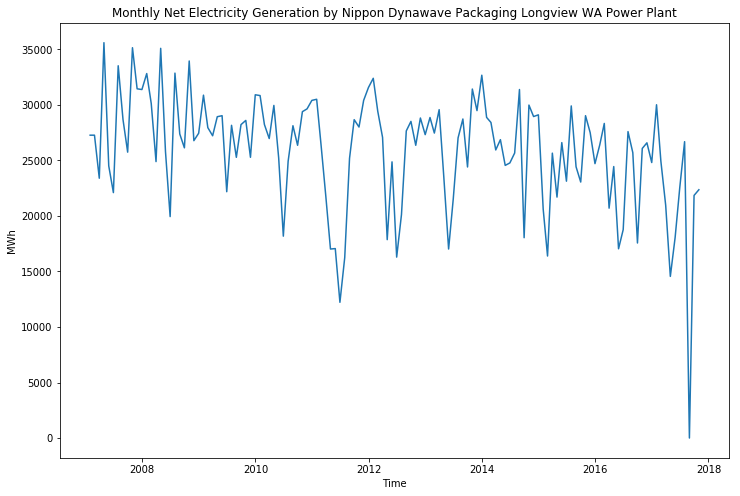

In [117]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(df_input.loc[:,'time_stamp'], df_input.loc[:, 'net_gen'])
ax.set_xlabel('Time');
ax.set_ylabel('MWh');
ax.set_title('Monthly Net Electricity Generation by Nippon Dynawave Packaging Longview WA Power Plant');

In [118]:
df_input.to_csv('plantid50187.csv', index = False)

In [119]:
test = pd.read_csv('plantid50187.csv')

In [120]:
test

,time_stamp,net_gen
0,2007-01-31,27276.362
1,2007-02-28,27276.362
2,2007-03-31,23399.631
3,2007-04-30,35606.964
4,2007-05-31,24511.656
5,2007-06-30,22104.184
6,2007-07-31,33528.875
7,2007-08-31,28681.279
8,2007-09-30,25747.563
9,2007-10-31,35154.663


### 3. Group by Plant Id, Operator Id

In [93]:
def unique_by_state(raw_df):
    df = raw_df.iloc[raw_df.index.get_level_values('Plant State') == 'WA',:]
    df.groupby(level = 0).sum()
    return df

In [100]:
df2017_unique = unique_by_state(df2017_new)
df2017_unique.shape

(69, 12)

In [101]:
df2016_unique = unique_by_state(df2016_new)
df2016_unique.shape

(199, 12)

In [80]:
df2015_unique = unique_by_state(df2015_new)
df2015_unique.shape

(192, 12)

In [81]:
df2014_unique = unique_by_state(df2014_new)
df2014_unique.shape

(197, 12)

In [82]:
df2013_unique = unique_by_state(df2013_new)
df2013_unique.shape

(194, 12)

In [83]:
df2012_unique = unique_by_state(df2012_new)
df2012_unique.shape

(185, 12)

In [84]:
df2011_unique = unique_by_state(df2011_new)
df2011_unique.shape

(183, 12)

In [85]:
df2010_unique = unique_by_state(df2010_new)
df2010_unique.shape

(33, 13)

In [86]:
df2009_unique = unique_by_state(df2009_new)
df2009_unique.shape

(31, 13)

In [87]:
df2008_unique = unique_by_state(df2008_new)
df2008_unique.shape

(27, 13)

In [88]:
df2007_unique = unique_by_state(df2007_new)
df2007_unique.shape

(158, 12)

### 4. Create Multi-index from unique Plant Id & Operator Id

In [119]:
plantid_set = set(df2017_unique.index.get_level_values('Plant Id').unique())

In [120]:
plantid_set = plantid_set.intersection(set(df2016_unique.index.get_level_values('Plant Id').unique()))

In [121]:
plantid_set = plantid_set.intersection(set(df2015_unique.index.get_level_values('Plant Id').unique()))

In [122]:
plantid_set = plantid_set.intersection(set(df2014_unique.index.get_level_values('Plant Id').unique()))

In [ ]:
plantid_set = plantid_set.intersection(set(df2013_unique.index.get_level_values('Plant Id').unique()))

In [126]:
plantid_set = plantid_set.intersection(set(df2012_unique.index.get_level_values('Plant Id').unique()))

In [128]:
plantid_set = plantid_set.intersection(set(df2011_unique.index.get_level_values('Plant Id').unique()))

In [130]:
plantid_set = plantid_set.intersection(set(df2010_unique.index.get_level_values('Plant Id').unique()))

In [132]:
plantid_set = plantid_set.intersection(set(df2009_unique.index.get_level_values('Plant Id').unique()))

In [134]:
plantid_set = plantid_set.intersection(set(df2008_unique.index.get_level_values('Plant Id').unique()))

In [136]:
plantid_set = plantid_set.intersection(set(df2007_unique.index.get_level_values('Plant Id').unique()))

In [137]:
len(plantid_set)

5

In [138]:
plantid_set

{3845, 50187, 50886, 54268, 54537}

In [147]:
df2017_unique.loc[df2017_unique.index.get_level_values('Plant Id') == 3845, :]

JAN_2017  \
Plant Id Plant Name                     Operator Id Operator Name               Plant State            
3845     Transalta Centralia Generation 19099       TransAlta Centralia Gen LLC WA           2827.45   
                                                                                WA            493133   
                                                                                WA                 0   
                                                                                WA           2952.39   

                                                                                            FEB_2017  \
Plant Id Plant Name                     Operator Id Operator Name               Plant State            
3845     Transalta Centralia Generation 19099       TransAlta Centralia Gen LLC WA            72.118   
                                                                                WA            313283   
                                                                                WA                 0   
                                                                                WA           222.626   

                                                                                            MAR_2017  \
Plant Id Plant Name                     Operator Id Operator Name               Plant State            
3845     Transalta Centralia Generation 19099       TransAlta Centralia Gen LLC WA                 0   
                                                                                WA                 0   
                                                                                WA                 0   
                                                                                WA                 0   

                                                                                            APR_2017  \
Plant Id Plant Name                     Operator Id Operator Name               Plant State            
3845     Transalta Centralia Generation 19099       TransAlta Centralia Gen LLC WA                 0   
                                                                                WA                 0   
                                                                                WA                 0   
                                                                                WA                 0   

                                                                                            MAY_2017  \
Plant Id Plant Name                     Operator Id Operator Name               Plant State            
3845     Transalta Centralia Generation 19099       TransAlta Centralia Gen LLC WA                 0   
                                                                                WA                 0   
                                                                                WA                 0   
                                                                                WA                 0   

                                                                                            JUN_2017  \
Plant Id Plant Name                     Operator Id Operator Name               Plant State            
3845     Transalta Centralia Generation 19099       TransAlta Centralia Gen LLC WA                 0   
                                                                                WA                 0   
                                                                                WA                 0   
                                                                                WA                 0   

                                                                                            JUL_2017  \
Plant Id Plant Name                     Operator Id Operator Name               Plant State            
3845     Transalta Centralia Generation 19099       TransAlta Centralia Gen LLC WA            3468.2   
                              

In [148]:
df2017_unique.loc[df2017_unique.index.get_level_values('Plant Id') == 50187, :]

JAN_2017  \
Plant Id Plant Name                            Operator Id Operator Name                 Plant State            
50187    Nippon Dynawave Packaging Longview WA 60561       Nippon Dynawave Packaging Co. WA           14139.9   
                                                                                         WA             3.694   
                                                                                         WA           5407.91   
                                                                                         WA           122.018   
                                                                                         WA           1512.64   
                                                                                         WA           2826.57   
                                                                                         WA           6003.62   

                                                                                                     FEB_2017  \
Plant Id Plant Name                            Operator Id Operator Name                 Plant State            
50187    Nippon Dynawave Packaging Longview WA 60561       Nippon Dynawave Packaging Co. WA           12915.7   
                                                                                         WA            45.057   
                                                                                         WA           4349.62   
                                                                                         WA             4.169   
                                                                                         WA           1034.12   
                                                                                         WA           3053.61   
                                                                                         WA           3530.05   

                                                                                                     MAR_2017  \
Plant Id Plant Name                            Operator Id Operator Name                 Plant State            
50187    Nippon Dynawave Packaging Longview WA 60561       Nippon Dynawave Packaging Co. WA           12275.7   
                                                                                         WA            21.548   
                                                                                         WA           3142.39   
                                                                                         WA             9.703   
                                                                                         WA           937.881   
                                                                                         WA           447.917   
                                                                                         WA           4131.78   

                                                                                                     APR_2017  \
Plant Id Plant Name                            Operator Id Operator Name                 Plant State            
50187    Nippon Dynawave Packaging Longview WA 60561       Nippon Dynawave Packaging Co. WA           6836.34   
                                                                                         WA             7.651   
                                                                                         WA           2181.99   
                                                                                         WA           313.793   
                                                                                         WA            578.79   
                                                                                         WA           2782.29   
                                                                                         WA           1857.42   

                             

In [149]:
df2017_unique.loc[df2017_unique.index.get_level_values('Plant Id') == 50886, :]

JAN_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA           3798.06   
                                                             WA           3648.94   

                                                                         FEB_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA           3008.49   
                                                             WA           2890.51   

                                                                         MAR_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA           5821.66   
                                                             WA           5593.34   

                                                                         APR_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA           6204.89   
                                                             WA           5962.11   

                                                                         MAY_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA           6075.93   
                                                             WA           5837.07   

                                                                         JUN_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA           655.333   
                                                             WA           629.667   

                                                                         JUL_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA           5945.29   
                                                             WA           5712.71   

                                                                         AUG_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA           5709.54   
                                                             WA           5485.46   

                                                                         SEP_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA           5724.98   
                                                             WA           5500.02   

                                                                         OCT_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA           6034.01   
                                                             WA           5796.99   

                                                                         NOV_2017  \
Plant Id Plant Name              Operator Id Operator Name   Plant State            
50886    Spokane Waste to Energy 42892       City of Spokane WA                 .   
                                                             WA                 .   

                                                                         DEC_2017  
Plant Id Plant Name              Operator Id Operator Name   Plant State           
50886    Spokane Waste to Energy 42892       City of Spokane WA                 .  
                                                             WA       

In [150]:
df2017_unique.loc[df2017_unique.index.get_level_values('Plant Id') == 54268, :]

JAN_2017  \
Plant Id Plant Name               Operator Id Operator Name               Plant State            
54268    March Point Cogeneration 11459       March Point Cogeneration Co WA                 0   
                                                                          WA                 0   
                                                                          WA           57386.6   
                                                                          WA           36727.4   

                                                                                      FEB_2017  \
Plant Id Plant Name               Operator Id Operator Name               Plant State            
54268    March Point Cogeneration 11459       March Point Cogeneration Co WA                 0   
                                                                          WA                 0   
                                                                          WA           63111.1   
                                                                          WA           22439.9   

                                                                                      MAR_2017  \
Plant Id Plant Name               Operator Id Operator Name               Plant State            
54268    March Point Cogeneration 11459       March Point Cogeneration Co WA                 0   
                                                                          WA                 0   
                                                                          WA           59220.8   
                                                                          WA           23113.2   

                                                                                      APR_2017  \
Plant Id Plant Name               Operator Id Operator Name               Plant State            
54268    March Point Cogeneration 11459       March Point Cogeneration Co WA                 0   
                                                                          WA                 0   
                                                                          WA           46728.3   
                                                                          WA           21081.7   

                                                                                      MAY_2017  \
Plant Id Plant Name               Operator Id Operator Name               Plant State            
54268    March Point Cogeneration 11459       March Point Cogeneration Co WA                 0   
                                                                          WA                 0   
                                                                          WA           42749.9   
                                                                          WA           24995.1   

                                                                                      JUN_2017  \
Plant Id Plant Name               Operator Id Operator Name               Plant State            
54268    March Point Cogeneration 11459       March Point Cogeneration Co WA                 0   
                                                                          WA                 0   
                                                                          WA           39157.1   
                                                                          WA           31248.9   

                                                                                      JUL_2017  \
Plant Id Plant Name               Operator Id Operator Name               Plant State            
54268    March Point Cogeneration 11459       March Point Cogeneration Co WA                 0   
                                                                          WA                 0   
                                                                          WA           40610.1   
                                                              

In [151]:
df2017_unique.loc[df2017_unique.index.get_level_values('Plant Id') == 54537, :]

JAN_2017  \
Plant Id Plant Name                  Operator Id Operator Name          Plant State            
54537    Ferndale Generating Station 15500       Puget Sound Energy Inc WA             1.656   
                                                                        WA           24796.3   
                                                                        WA              3.65   
                                                                        WA           54644.3   

                                                                                    FEB_2017  \
Plant Id Plant Name                  Operator Id Operator Name          Plant State            
54537    Ferndale Generating Station 15500       Puget Sound Energy Inc WA             0.206   
                                                                        WA           15139.8   
                                                                        WA             0.453   
                                                                        WA           33385.5   

                                                                                    MAR_2017  \
Plant Id Plant Name                  Operator Id Operator Name          Plant State            
54537    Ferndale Generating Station 15500       Puget Sound Energy Inc WA                 0   
                                                                        WA             14319   
                                                                        WA                 0   
                                                                        WA             31184   

                                                                                    APR_2017  \
Plant Id Plant Name                  Operator Id Operator Name          Plant State            
54537    Ferndale Generating Station 15500       Puget Sound Energy Inc WA                 0   
                                                                        WA             26000   
                                                                        WA                 0   
                                                                        WA             54154   

                                                                                    MAY_2017  \
Plant Id Plant Name                  Operator Id Operator Name          Plant State            
54537    Ferndale Generating Station 15500       Puget Sound Energy Inc WA                 0   
                                                                        WA              2284   
                                                                        WA                 0   
                                                                        WA              4710   

                                                                                    JUN_2017  \
Plant Id Plant Name                  Operator Id Operator Name          Plant State            
54537    Ferndale Generating Station 15500       Puget Sound Energy Inc WA                 0   
                                                                        WA                 0   
                                                                        WA                 0   
                                                                        WA                 0   

                                                                                    JUL_2017  \
Plant Id Plant Name                  Operator Id Operator Name          Plant State            
54537    Ferndale Generating Station 15500       Puget Sound Energy Inc WA             7.895   
                                                                        WA           29477.1   
                                                                        WA            16.648   
                                                                        WA           62155.4   

                                             

In [153]:
df2016_unique.loc[df2016_unique.index.get_level_values('Plant Id') == 50329, :]

JAN_2016  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1166.54   

                                                                                         FEB_2016  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA            1312.5   

                                                                                         MAR_2016  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1460.47   

                                                                                         APR_2016  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1458.45   

                                                                                         MAY_2016  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1422.68   

                                                                                         JUN_2016  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1029.13   

                                                                                         JUL_2016  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA            1328.6   

                                                                                         AUG_2016  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1206.38   

                                                                                         SEP_2016  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1219.04   

                                                                                         OCT_2016  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA            1400.4   

                                       

In [154]:
df2015_unique.loc[df2015_unique.index.get_level_values('Plant Id') == 50329, :]

JAN_2015  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1309.52   

                                                                                         FEB_2015  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1322.79   

                                                                                         MAR_2015  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1451.32   

                                                                                         APR_2015  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1416.29   

                                                                                         MAY_2015  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1480.47   

                                                                                         JUN_2015  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA            894.92   

                                                                                         JUL_2015  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1444.91   

                                                                                         AUG_2015  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1416.12   

                                                                                         SEP_2015  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1377.28   

                                                                                         OCT_2015  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1492.78   

                                       

In [155]:
df2014_unique.loc[df2014_unique.index.get_level_values('Plant Id') == 50329, :]

JAN_2014  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1525.52   

                                                                                         FEB_2014  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1333.12   

                                                                                         MAR_2014  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1437.61   

                                                                                         APR_2014  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1345.41   

                                                                                         MAY_2014  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1378.56   

                                                                                         JUN_2014  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1027.98   

                                                                                         JUL_2014  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1202.17   

                                                                                         AUG_2014  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA            1617.2   

                                                                                         SEP_2014  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1559.08   

                                                                                         OCT_2014  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           1601.66   

                                       

In [156]:
df2013_unique.loc[df2013_unique.index.get_level_values('Plant Id') == 50329, :]

JAN_2013  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           563.946   

                                                                                         FEB_2013  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           514.666   

                                                                                         MAR_2013  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           570.084   

                                                                                         APR_2013  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           566.675   

                                                                                         MAY_2013  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           552.206   

                                                                                         JUN_2013  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           447.977   

                                                                                         JUL_2013  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           524.061   

                                                                                         AUG_2013  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           591.526   

                                                                                         SEP_2013  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA            571.71   

                                                                                         OCT_2013  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA           535.432   

                                       

In [157]:
df2012_unique.loc[df2012_unique.index.get_level_values('Plant Id') == 50329, :]

JAN_2012  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 .   
                                                                             WA                 .   

                                                                                         FEB_2012  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 .   
                                                                             WA                 .   

                                                                                         MAR_2012  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 .   
                                                                             WA                 .   

                                                                                         APR_2012  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 .   
                                                                             WA                 .   

                                                                                         MAY_2012  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 .   
                                                                             WA                 .   

                                                                                         JUN_2012  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA            22.249   

                                                                                         JUL_2012  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA            27.808   

                                                                                         AUG_2012  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA             29.55   

                                                                                         SEP_2012  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA            30.296   

                                                                                         OCT_2012  \
Plant Id Plant Name                 Operator Id Operator Name                Plant State            
50329    West Point Treatment Plant 10004       King County Dept-Natural Res WA                 0   
                                                                             WA            29.636   

                                       

In [158]:
df2011_unique.loc[df2011_unique.index.get_level_values('Plant Id') == 50329, :]

,,,,,JAN_2011,FEB_2011,MAR_2011,APR_2011,MAY_2011,JUN_2011,JUL_2011,AUG_2011,SEP_2011,OCT_2011,NOV_2011,DEC_2011
Plant Id,Plant Name,Operator Id,Operator Name,Plant State,,,,,,,,,,,,
